# 트레이딩을 위한 기술적 지표

이번 장에서는 트레이딩 전략에 대해 알아보도록 하자. 앞서 종목을 선정하는데 사용되었던 분석이 '기본적 분석'이라면, 트레이딩은 과거 주가의 움직임이나 패턴을 통해 주식이 오를지 혹은 내릴지를 판단하는 '기술적 분석'에 의존하는 경우가 많으며, 이러한 판단을 위해 사용되는 것이 기술적 지표다. 기술적 지표는 추세의 방향이나 강도, 혹은 가격의 움직임의 속도와 정도를 측정한다. 이러한 기술적 지표를 이용한 트레이딩 전략은 크게 '추세추종전략'과 '평균회귀전략'으로 나눌 수 있다. 

1. 추세추종 전략: 주가가 동일한 방향으로 지속될 것이라는데 베팅하며, 이동평균 등의 지표가 사용된다.
2. 평균회귀 전략: 주가가 평균으로 다시 회귀하는데 베팅하며, RSI, 볼린저밴드 등의 지표가 사용된다.

이번 장에서는 대표적으로 유명한 지표들을 계산하는 방법에 대해 알아보도록 한다.

## pandas-ta 패키지

각각의 기술적 지표를 계산하는 수식이 존재하기에 이를 이용해 계산할 수도 있지만, 패키지를 이용하면 매우 손쉽게 계산할 수 있다. 기존에는 'TA-Lib' 패키지를 많이 사용했으나 이는 설치가 번거로운 문제가 있었다. 이에 반해 pandas-ta 패키지는 설치도 간단할 뿐만 아니라 TA-Lib 패키지와 동일하게 기술적 지표를 계산할 수 있다. 해당 패키지에 대한 자세한 내용은 공식 깃허브를 참조하기 바란다.

```
https://github.com/twopirllc/pandas-ta
```

## 이동평균

트렌드 지표 중 가장 대표적인 이동평균을 계산하는 법에 대해 알아보겠다. 이동평균은 정해진 기간동안 주식의 평균 가격이다. 예를 들어 10일간의 이동평균은 최근 10일간 가격의 평균을 의미한다. 이 기간이 길수록 장기간의 추세를 나타내며, 짧을수록 단기간의 추세를 나타낸다. 이동평균은 현재의 추세나 추세 역전, 혹은 저항 수준을 확인할 때 사용된다. 흔히 이동평균이 상승하는 상황에서 주가가 그보다 위에 있다면 상승 신호로 여겨진다. 반대로 이동평균이 하락하는 상황에서 주가가 그보다 아래에 있다면 하락 신호로 여겨진다.

골든크로스와 데드크로스라는 말을 많이 들어보았을 것이다. 골든크로스란 단기 이동평균선이 중장기 이동평균선을 아래에서 위로 뚫고 올라가는 현상으로써 강세신호를 나타내며, 반대로 데드크로스는 단기 이동평균선이 중장기 이동평균선을 위에서 아래로 뚫고 내려가는 현상으로써 약세신호를 나타낸다.

```{figure} image/technical/cross.png
---
name: cross
---
골든크로스와 데드크로스
```

이동평균을 계산하는 방법은 가격 데이터에 가중치를 얼마나 두냐에 따라 여러가지 방법이 존재하지만, 크게 단순 이동평균과 지수 이동평균이 사용된다.

- 단순 이동평균(SMA, Simple Moving Average): 이동평균을 계산할 때 사용되는 가장 일반적인 방법으로써, 단순히 주어진 기간 동안의 종가의 평균을 구한다.

$$SMA_n = (P_1 + P_2 + \dots + P_n) / n$$

- 지수 이동평균(EMA, Exponential Moving Average): 최근 데이터가 더욱 중요할 수 있으며, 지수 이동평균은 이를 반영하여 각 데이터에 가중치를 다르게 부여한 후 평균을 구한다.

$$EMA_n = P_n \times 승수 + 이전\ EMA \times (1-승수)$$
$$승수 = 2/(n+1)$$

TA-lib 패키지를 이용해 단순 이동평균과 지수 이동평균을 구해보도록 하겠다. 먼저 단순 이동평균을 계산해보자.

In [7]:
import yfinance as yf

stock_data = yf.download('^GSPC')
stock_data = stock_data.tail(500)

[*********************100%%**********************]  1 of 1 completed


S&P 500 지수(^GSPC) 데이터를 다운로드 받은 후, 최근 500일 데이터만 선택한다.

In [8]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,4412.609863,4426.220215,4364.839844,4401.669922,4401.669922,4600390000
2022-02-15,4429.279785,4472.770020,4429.279785,4471.069824,4471.069824,4430830000
2022-02-16,4455.750000,4489.549805,4429.680176,4475.009766,4475.009766,4283640000
2022-02-17,4456.060059,4456.060059,4373.810059,4380.259766,4380.259766,4539420000
2022-02-18,4384.569824,4394.600098,4327.220215,4348.870117,4348.870117,4708060000
...,...,...,...,...,...,...
2024-02-05,4957.189941,4957.189941,4918.089844,4942.810059,4942.810059,4023640000
2024-02-06,4950.160156,4957.770020,4934.879883,4954.229980,4954.229980,4440880000
2024-02-07,4973.049805,4999.890137,4969.049805,4995.060059,4995.060059,4895590000


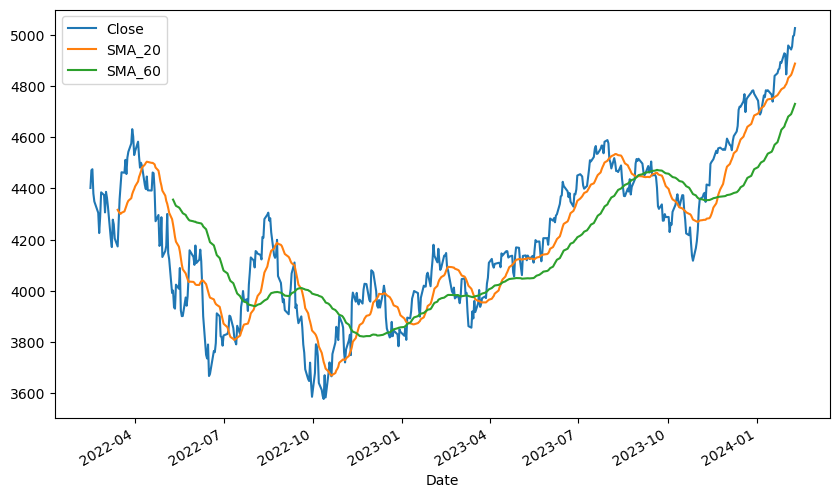

In [16]:
import pandas_ta as ta
import matplotlib.pyplot as plt

stock_data.loc[:, 'SMA_20'] = ta.sma(stock_data['Close'],
                              length=20)  # 20일 단순 이동평균
stock_data.loc[:, 'SMA_60'] = ta.sma(stock_data['Close'],
                              length=60)  # 60일 단순 이동평균

stock_data[['Close', 'SMA_20', 'SMA_60']].plot(figsize=(10, 6))
plt.show()

1. 패키지의 `sma()` 함수를 이용하면 손쉽게 단순 이동평균을 계산할 수 있다. 주가에 해당하는 열을 입력한 후, `length`에는 얼마의 기간에 해당하는 평균을 계산할지를 입력한다.
2. 종가, 20일 이동평균, 60일 이동평균에 해당하는 값을 그래프로 나타낸다.

이번에는 지수 이동평균을 계산해보자.

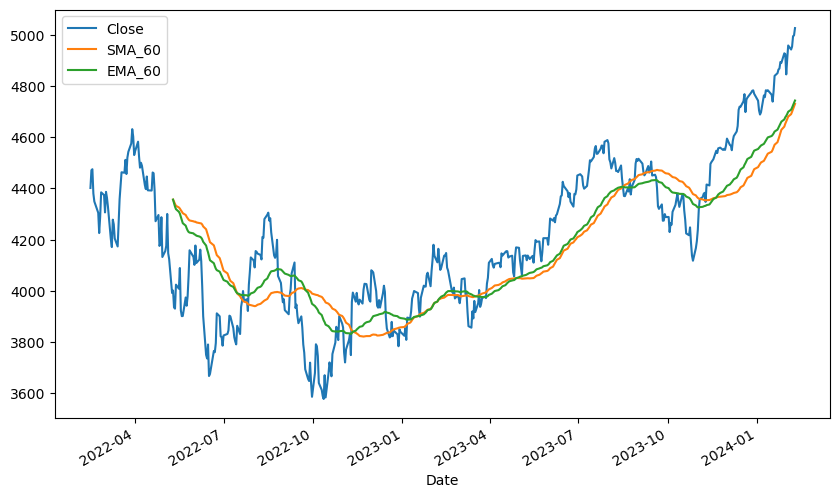

In [17]:
stock_data.loc[:, 'EMA_60'] = ta.ema(stock_data['Close'], 60)  # 60일 지수 이동평균
stock_data[['Close', 'SMA_60', 'EMA_60']].plot(figsize=(10, 6))
plt.show()

지수 이동평균 역시 `ema()` 함수를 통해 쉽게 계산할 수 있다. 60일 이동평균을 출력해보면, 지수 이동평균이 최근 데이터에 더 많은 가중치를 부여하기에, 단순 이동평균보다 주가의 움직임에 따라 더욱 민감하게 반응하는 것을 알 수 있다.

## 상대강도지수(RSI)

이번에는 상대강도지수(RSI)에 대해 알아보겠다. RSI는 일정기간 동안 주가의 상승폭과 하락폭의 크기를 비교해 상승과 하락의 상대적인 강도를 나타낸 지표로써, 다음과 같이 계산된다.

1. U(Up): 가격이 상승한 날의 상승폭
2. D(Down): 가격이 하락한 날의 하락폭
3. AU(Average Up)과 AD(Average Down): U값과 D값의 평균을 각각 구함
4. RS(Relative Strenth): AU/AD를 통해 상대강도를 구함

RS 값이 크다는 것은 일정기간 동안 상승한 폭이 하락한 폭보다 크다는 것을 의미하며, RSI는 0에서 100 범위 내에서 움직인다. 일반적으로 RSI가 70 이상일 경우 과매수 구간으로써 매도할 때로, 30 이하일 경우 과매도 구간으로써 매수해야 할 때로 여겨진다. 즉 지나친 상승 뒤에는 하락할 것을, 지나친 하락 뒤에는 상승할 것을 기대한다.

```{figure} image/technical/rsi.png
---
name: rsi
---
RSI 지표
```

S&P 500 지수의 RSI를 계산해보도록 하자.

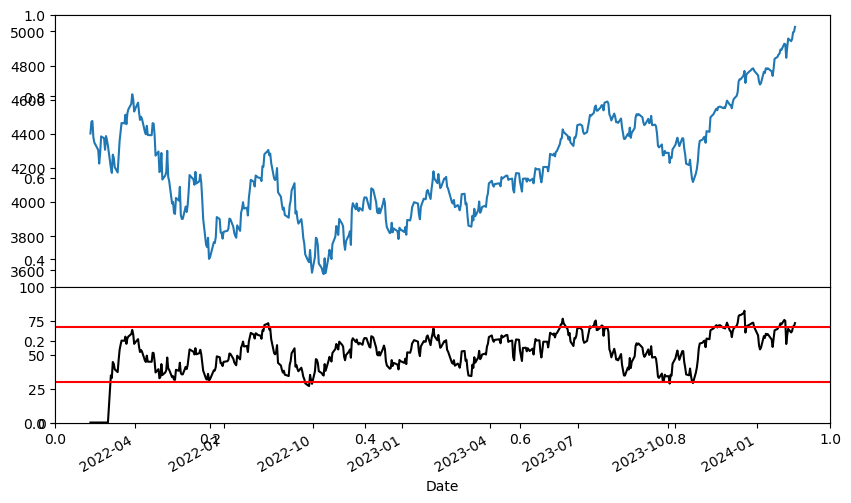

In [26]:
from matplotlib import gridspec

stock_data.loc[:, 'RSI_14'] = ta.rsi(stock_data['Close'], length=14)
stock_data.loc[:, 'RSI_14'] = stock_data['RSI_14'].fillna(0)
fig = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])

# 주가 나타내기
ax1 = plt.subplot(gs[0])
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

# RSI 나타내기
ax2 = plt.subplot(gs[1])
ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0, 100])
ax2.axhline(y=70, color='r', linestyle='-')
ax2.axhline(y=30, color='r', linestyle='-')
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

1. `rsi()` 함수를 이용해 RSI를 계산할 수 있으며, `length`는 기간을 의미한다.
2. `fillna()` 메서드를 통해 NA를 0으로 채워준다.
3. `GridSpec()` 함수를 통해 그림을 두 구간으로 나누어 준다.
4. 상단에는 주가를 그려준다.
5. 하단에는 RSI 및 과매수와 과매도를 의미하는 70과 30 부분에 수평선을 그려준다.
6. 두 그림 간 빈칸을 0으로 설정한다.

## 볼린저밴드

볼린저밴드는 이동평균선을 중심으로 일정 표준편차를 상한선과 하한선으로 설정한 밴드다. 

- 중심 밴드: n 기간 동안의 이동평균
- 상단 밴드: 중심 밴드 기준 k 표준편차 위
- 하단 밴드: 중심 밴드 기준 k 표준편차 아래

```{figure} image/technical/bb.png
---
name: bb
---
볼린저밴드
```

이는 주가의 움직임이 정규분포를 따른다는 가정에 기초한다. 정규분포에서는 데이터가 1 표준편차 내에 있을 확률이 약 68%, 2 표준편차 내에 있을 확률이 약 95%, 3 표준편차 내에 있을 확률이 약 99%다. 만일 주가가 정규분포를 따른다면, 주가의 움직임은 상한선과 하한선으로 구성된 밴드 내에서만 움직일 확률이 높다. 따라서 주가가 상한선 위에 있다는 것은 과매수 상태이므로 하락할 가능성이, 하단선 아래에 있다는 것은 과매도 상태이므로 상승할 가능성이 높다.

```{figure} image/technical/norm.png
---
name: norm
---
정규분포에 따른 확률
```

S&P 500 지수의 볼린저밴드를 계산해보도록 하자.

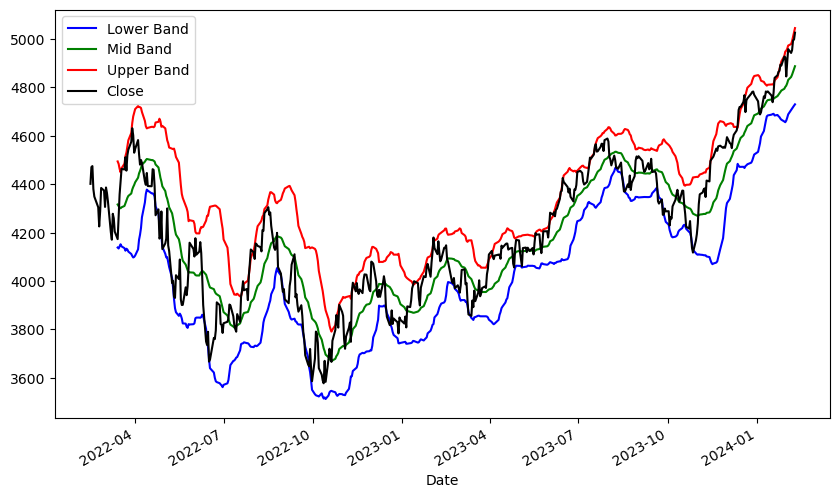

In [46]:
import pandas as pd

band = ta.bbands(stock_data["Close"], length=20, std=2)
bb = pd.concat([band[['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0']], stock_data['Close']], axis = 1)
bb.columns = ['Lower Band', 'Mid Band', 'Upper Band', 'Close']
bb.plot(figsize=(10, 6),
        color={
            'Upper Band': 'red',
            'Lower Band': 'blue',
            'Mid Band': 'green',
            'Close': 'black'
        })
plt.show()

1. `bbands()` 함수를 이용해 볼린저 밴드의 상, 중, 하단 값을 계산한다 `length`는 이동평균에 계산되는 최근 일수이며, `std`는 상단과 하단 밴드를 몇 표준편차 기준으로 계산할지를 의미한다.
2. 볼린저밴드 값과 종가를 `concat()` 함수를 이용해 하나의 데이터프레임으로 합찬다.
3. 그래프로 나타내며, 각각의 색을 지정한다.

주가가 크게 움직이지 않는 한 2 표준편차로 계산된 밴드 내에서 주가가 움직이는 것이 확인된다.